In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/Colab Notebooks"


ds_akhil


In [3]:
!ls "/content/drive/MyDrive/Colab Notebooks/ds_akhil"


'Copy of Welcome To Colab'   notebook_1.ipynb


In [4]:
!ls "/content/drive/MyDrive/Colab Notebooks/ds_akhil/csv_files"


ls: cannot access '/content/drive/MyDrive/Colab Notebooks/ds_akhil/csv_files': No such file or directory


In [5]:
!ls "/content/drive/MyDrive/Colab Notebooks/ds_akhil/csv_files"


fear_greed_index.csv  historical_data.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
trades = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/ds_akhil/csv_files/historical_data.csv"
)

sentiment = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/ds_akhil/csv_files/fear_greed_index.csv"
)


In [13]:
print("Trades Data:")
print(trades.head())
print(trades.columns)

print("\nSentiment Data:")
print(sentiment.head())
print(sentiment.columns)


Trades Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         

In [15]:
# Historical trader data
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades['date'] = trades['Timestamp IST'].dt.date

# Fear-Greed data
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce').dt.date


In [16]:
merged = pd.merge(trades, sentiment, on='date', how='inner')
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed


In [17]:
merged['classification'].value_counts()


,count
classification,
Fear,13869
Greed,11292
Extreme Greed,5621
Neutral,2756
Extreme Fear,2326


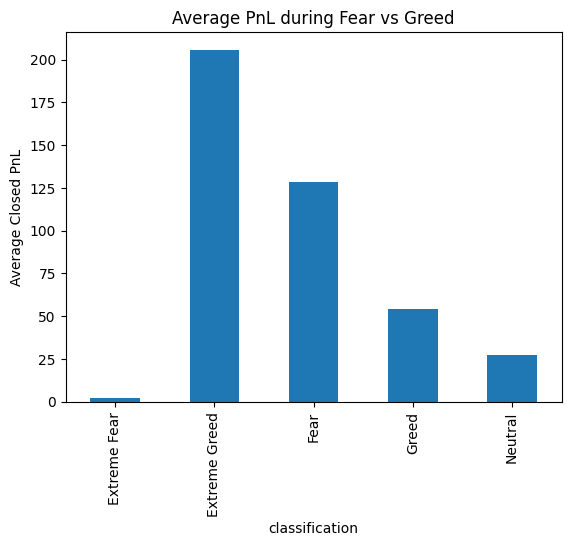

In [18]:
pnl_sentiment = merged.groupby('classification')['Closed PnL'].mean()

pnl_sentiment.plot(kind='bar', title='Average PnL during Fear vs Greed')
plt.ylabel("Average Closed PnL")
plt.show()


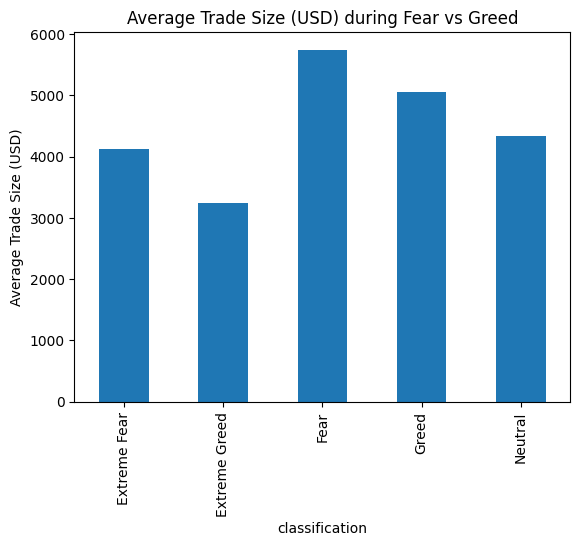

In [19]:
volume_sentiment = merged.groupby('classification')['Size USD'].mean()

volume_sentiment.plot(kind='bar', title='Average Trade Size (USD) during Fear vs Greed')
plt.ylabel("Average Trade Size (USD)")
plt.show()


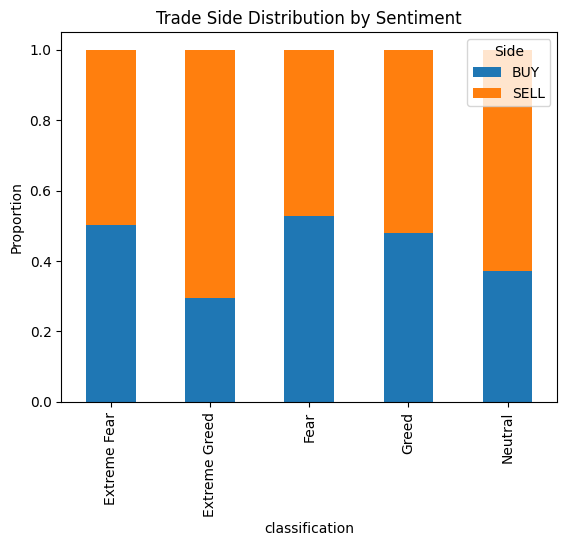

In [20]:
direction_sentiment = pd.crosstab(
    merged['classification'],
    merged['Side'],
    normalize='index'
)

direction_sentiment.plot(kind='bar', stacked=True, title='Trade Side Distribution by Sentiment')
plt.ylabel("Proportion")
plt.show()
